## Import libraries and dataset




In [ ]:
import pandas as pd

df = pd.read_csv('/tmp/lithium-ion batteries.csv')
df.head()


  Materials Id       Formula Spacegroup  Formation Energy (eV)  \
0    mp-849394     Li2MnSiO4         Pc                 -2.699   
1    mp-783909     Li2MnSiO4      P21/c                 -2.696   
2    mp-761311    Li4MnSi2O7         Cc                 -2.775   
3    mp-761598  Li4Mn2Si3O10       C2/c                 -2.783   
4    mp-767709  Li2Mn3Si3O10       C2/c                 -2.747   

   E Above Hull (eV)  Band Gap (eV)  Nsites  Density (gm/cc)   Volume  \
0              0.006          3.462      16            2.993  178.513   
1              0.008          2.879      32            2.926  365.272   
2              0.012          3.653      28            2.761  301.775   
3              0.013          3.015      38            2.908  436.183   
4              0.016          2.578      36            3.334  421.286   

   Has Bandstructure Crystal System  
0               True     monoclinic  
1               True     monoclinic  
2               True     monoclinic  
3           

# Part 1 - Data exploration

Explore the dataset to understand the distribution of crystal systems (monoclinic, orthorhombic, triclinic) and identify any potential issues with the data (missing values, outliers, etc.).


In [ ]:
# Check for missing values in the dataset.
print(df.isnull().sum())


Materials Id             0
Formula                  0
Spacegroup               0
Formation Energy (eV)    0
E Above Hull (eV)        0
Band Gap (eV)            0
Nsites                   0
Density (gm/cc)          0
Volume                   0
Has Bandstructure        0
Crystal System           0
dtype: int64


In [ ]:
# Check the distribution of crystal systems in the dataset.
print(df['Crystal System'].value_counts())


Crystal System
monoclinic      139
orthorhombic    128
triclinic        72
Name: count, dtype: int64


In [ ]:
# Statistical summary of the numerical features in the dataset.
print(df.describe())


       Formation Energy (eV)  E Above Hull (eV)  Band Gap (eV)      Nsites  \
count             339.000000         339.000000     339.000000  339.000000   
mean               -2.616950           0.058215       2.079740   38.837758   
std                 0.183809           0.030363       1.087968   23.133142   
min                -2.985000           0.000000       0.000000   10.000000   
25%                -2.757500           0.035500       1.265500   26.000000   
50%                -2.605000           0.062000       2.499000   31.000000   
75%                -2.525500           0.081500       2.968000   52.000000   
max                -2.012000           0.190000       3.823000  132.000000   

       Density (gm/cc)       Volume  
count       339.000000   339.000000  
mean          2.984003   467.765619  
std           0.353968   292.674559  
min           2.200000   122.581000  
25%           2.760500   286.381500  
50%           2.947000   358.537000  
75%           3.106000   601.69

## 1.1 - Data cleaning




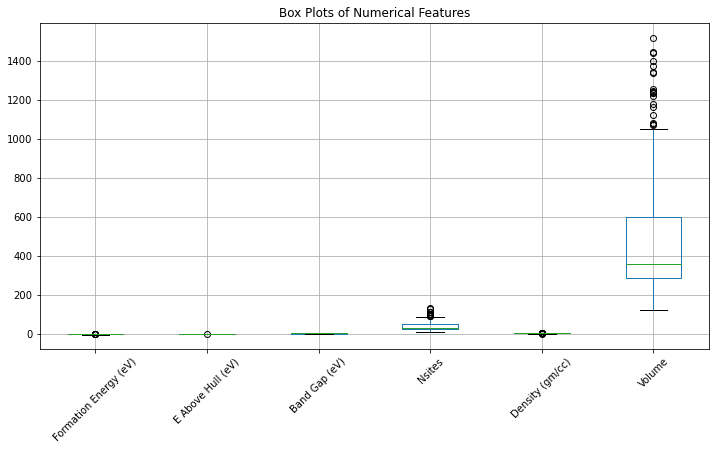

In [ ]:
import matplotlib.pyplot as plt

# Select numerical columns for outlier detection
numerical_cols = ['Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)', 'Volume']

# Create box plots for numerical columns
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot()
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()



Based on the box plots, there are outliers in 'E Above Hull (eV)', 'Band Gap (eV)', and 'Nsites'.

In [ ]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers from 'E Above Hull (eV)', 'Band Gap (eV)', and 'Nsites'
df = remove_outliers_iqr(df, 'E Above Hull (eV)')
df = remove_outliers_iqr(df, 'Band Gap (eV)')
df = remove_outliers_iqr(df, 'Nsites')



Ensure data consistency in the 'Crystal System' column and remove any duplicate rows.



In [ ]:
# Check for unique values in 'Crystal System' column
print(df['Crystal System'].unique())

# Remove duplicate rows
df = df.drop_duplicates()



['monoclinic' 'orthorhombic' 'triclinic']


In [ ]:
# Check data types of all columns
print(df.dtypes)



Materials Id              object
Formula                   object
Spacegroup                object
Formation Energy (eV)    float64
E Above Hull (eV)        float64
Band Gap (eV)            float64
Nsites                     int64
Density (gm/cc)          float64
Volume                   float64
Has Bandstructure           bool
Crystal System            object
dtype: object


## 1.2 - Encode categorical data



In [ ]:
# Convert 'Crystal System' to categorical data type
df['Crystal System'] = df['Crystal System'].astype('category')

# Verify the data type change
print(df.dtypes)


Materials Id               object
Formula                    object
Spacegroup                 object
Formation Energy (eV)     float64
E Above Hull (eV)         float64
Band Gap (eV)             float64
Nsites                      int64
Density (gm/cc)           float64
Volume                    float64
Has Bandstructure            bool
Crystal System           category
dtype: object


# Part 2 - feature_engineering




In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = ['Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)', 'Volume']
X = df[features]

# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(X_scaled, columns=features)


# Part 3 - Train test split



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['Crystal System'], test_size=0.25, random_state=42)


# Part 4 - Data preparation




In [ ]:
from sklearn.decomposition import PCA
# Instantiate a PCA object with n_components=2 for visualization purposes.
pca = PCA(n_components=2)
# Fit the PCA object to the scaled training data (X_train) to learn the principal components.
pca.fit(X_train)
# Apply the learned PCA transformation to both the training and testing data to project them onto the principal component axes.
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Store the transformed training and testing data in new DataFrames for further analysis or visualization.
df_pca_train = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])
df_pca_test = pd.DataFrame(data=X_test_pca, columns=['PC1', 'PC2'])


# Part 5: Train the model


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_pca_train)

In [ ]:
# store the cluster labels for each data point in a new column within `df_pca_train`.
df_pca_train['cluster_label'] = kmeans.labels_



# Part 6 - Model evaluation




In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Predict cluster labels for the testing data
y_pred = kmeans.predict(df_pca_test)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_pca_test, y_pred)
print("Silhouette Score:", silhouette_avg)

# Calculate Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(df_pca_test, y_pred)
print("Calinski-Harabasz Score:", calinski_harabasz)


Silhouette Score: 0.46453681514520423
Calinski-Harabasz Score: 98.60947372803625


# Part 7 - Data visualization




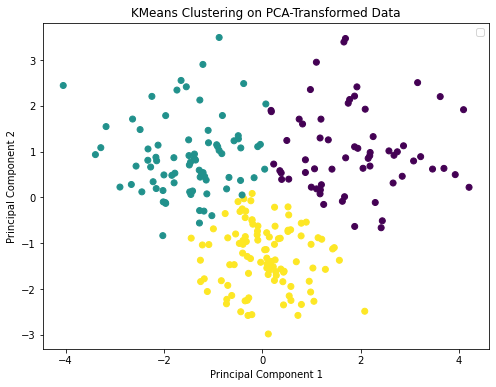

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_train['PC1'], df_pca_train['PC2'], c=df_pca_train['cluster_label'], cmap='viridis')

# Add a legend to indicate the cluster assignments
plt.legend(handles=plt.gca().get_legend_handles_labels()[0], labels=[f'Cluster {i}' for i in range(3)])

# Label the axes and set a title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering on PCA-Transformed Data')

# Display the plot
plt.show()
